<h1>Data setup</h1>
<h2>Use our function to read the data file</h2>

In [13]:
# path = "C:\\Users\\anatl\\JupyterNotebooks\\IntroToDataScience\\" 
# datafile = path + "lesson4.3_MELBOURNE_HOUSE_PRICES_LESS.csv"
# data = pd.read_csv(path+"Melborne_real_estate_GEO.csv")

datafile = "https://raw.githubusercontent.com/goldanat/Intro2DataScience/main/resources/lesson4.3_MELBOURNE_HOUSE_PRICES_LESS.csv"

geo_data_file = "https://raw.githubusercontent.com/goldanat/Intro2DataScience/main/resources/Melborne_real_estate_GEO.csv"

In [7]:
api_key = 'AIz........................5D3E' 

In [2]:
import pandas as pd
import matplotlib
import numpy as np
import json

In [3]:
def read_real_estate_data(datafile):
    import pandas as pd
    import numpy as np
    #Add the fix_zip function
    def fix_postcode(input_postcode):
        try:
            input_postcode = int(float(input_postcode))
        except:
            try:
                input_postcode = int(input_postcode.split('-')[0])
            except:
                return np.NaN
        if input_postcode < 1000 or input_postcode > 9999:
            return np.NaN
        return str(input_postcode)
    
    #Read the file
    df = pd.read_csv(datafile)
    
    #fix the zip
    df['Postcode'] = df['Postcode'].apply(fix_postcode)
    
    #drop all rows that have any nans in them (note the easier syntax!)
    
    df = df.dropna(how='any')    
    
    #Convert times to datetime and create a processing time column
    df['Avg_room_num'] = df.groupby('CouncilArea')['Rooms'].transform('mean')
    df['Rel_room_num'] = df.apply(lambda row: row.Rooms/row.Avg_room_num, axis=1) #data['Rooms']/data['Avg_room_num']
    
    import datetime
    df['Date'] = df['Date'].apply(lambda x:datetime.datetime.strptime(x,'%d/%m/%Y'))    
   
    return df
    

In [4]:
df = read_real_estate_data(datafile)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Avg_room_num,Rel_room_num
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3.003236,0.998922
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.003236,0.665948


<h1>Plotting data on google maps</h1>
<H2>let's say we want to plot sold houses on a map </h2>
<h2>gmplot library</h2>
https://github.com/vgm64/gmplot

In [5]:
!pip install gmplot --upgrade
# this is a library for google map plotting

### Let's add to our dataframe latitudes and longitudes for each property
#### We'll use the function we wrote in Lesson 3.2


In [8]:
def get_lat_lng(address_string):
    import requests
    #python code goes here
    url="https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (address_string + " Melbourne Australia",api_key)

    # Another approach:
    # serviceurl="https://maps.googleapis.com/maps/api/geocode/json?"
    # parms = dict()
    # parms['address'] = address_string
    # parms['key'] = api_key
    # url = serviceurl + urllib.parse.urlencode(parms)

    try:
        response = requests.get(url)
        if not response.status_code == 200:
            print("HTTP error",response.status_code)
        else:
            try:
                response_data = response.json()
                return(response_data['results'][0]['geometry']['location'])
            except:
                print("Response not in valid JSON format")
    except:
        print("Something went wrong with requests.get")
        


In [9]:
(get_lat_lng("Ariel University, Ariel Israel"))

{'lat': -37.8136276, 'lng': 144.9630576}

In [10]:
df.shape

(48432, 15)

### Adding lat / lng for each property:

In [11]:
# To save calls to the google Geo location Google api lets look at a subset of our dataset:
data = df[0:500]
data
data['lat_long'] = data['Address'].apply(get_lat_lng)

import json
data['lat_long'] = data['lat_long'].apply(lambda x: json.loads(x.replace('\'', '\"')) if pd.notnull(x) else np.nan)
data['lat'] = data['lat_long'].apply(lambda x:  x['lat'] if pd.notnull(x) else 0)
data['lng'] = data['lat_long'].apply(lambda x:  x['lng'] if pd.notnull(x) else 0)

### if you do not want to run this code you can just read this file:
#data = pd.read_csv(path+"Melborne_real_estate_GEO.csv")

C:\Users\anatl\AppData\Local\Temp/ipykernel_8764/1811335078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat_long'] = data['Address'].apply(get_lat_lng)


In [24]:
#Another way to do the same:
def calcLat(geoDict):
    if pd.notnull(geoDict):
        return (geoDict['lat'])
    else:
        return (0)

data['lat'] = data['lat_long'].apply(calcLat)

In [17]:
data.iloc[0]

Unnamed: 0                                             0
Unnamed: 0.1                                           0
Suburb                                        Abbotsford
Address                                    49 Lithgow St
Rooms                                                  3
Type                                                   h
Price                                          1490000.0
Method                                                 S
SellerG                                           Jellis
Date                                          2017-04-01
Postcode                                            3067
Regionname                         Northern Metropolitan
Propertycount                                       4019
Distance                                             3.0
CouncilArea                           Yarra City Council
Avg_room_num                                     2.34697
Rel_room_num                                    1.278244
lat_long         {'lat': 42.290

In [34]:
data.to_csv(path+"Melborne_real_estate_GEO.csv")

### Instead we can use a presaved dataset:

In [14]:
### if you do not want to run the above code you can just read this file:
data = pd.read_csv(geo_data_file)
data

,Unnamed: 0,Unnamed: 0.1,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Avg_room_num,Rel_room_num,lat_long,lat,lng
0,0,0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244,"{'lat': 42.2901011, 'lng': -71.0688615}",42.290101,-71.068861
1,1,1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244,"{'lat': -37.799492, 'lng': 144.99766}",-37.799492,144.997660
2,2,2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244,"{'lat': -37.8026507, 'lng': 144.9996482}",-37.802651,144.999648
3,3,3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3.003236,0.998922,NaN,0.000000,0.000000
4,4,4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.003236,0.665948,"{'lat': 40.6136589, 'lng': -74.3863904}",40.613659,-74.386390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,635,Wantirna South,7 Talwood Cl,5,h,1390000.0,S,Ray,2017-04-01,3152,Eastern Metropolitan,7082,14.7,Knox City Council,3.613333,1.383764,"{'lat': -37.8677326, 'lng': 145.2168801}",-37.867733,145.216880
496,496,637,Warrandyte,48 Yarra St,3,h,730000.0,S,Carter,2017-04-01,3113,Eastern Metropolitan,2003,21.1,Manningham City Council,3.617919,0.829206,"{'lat': -37.741834, 'lng': 145.211861}",-37.741834,145.211861
497,497,638,Werribee,65 Market Rd,2,h,700000.0,S,Triwest,2017-04-01,3030,Western Metropolitan,16166,14.7,Wyndham City Council,3.401213,0.588025,"{'lat': -37.895183, 'lng': 144.658371}",-37.895183,144.658371
498,498,639,Werribee,21 Parrakeet Rd,3,h,452000.0,S,hockingstuart,2017-04-01,3030,Western Metropolitan,16166,14.7,Wyndham City Council,3.401213,0.882038,"{'lat': -37.8891739, 'lng': 144.6785173}",-37.889174,144.678517


<h3>Set up the map</h3>
<h4>GoogleMapPlotter constructor</h4>
<ul>
<li>GoogleMapPlotter(center_lat, center_lng, zoom)
<li>from_geocode(location_string,zoom) -- This currently doesnt work...


In [19]:
import gmplot
gmap = gmplot.GoogleMapPlotter(-37.808313,144.998459, 10)


In [20]:
gmap

<h3>Then generate the heatmap passing the two data series (latitude and longitude) to the function</h3>

In [22]:
#Then generate a heatmap using the latitudes and longitudes
gmap.heatmap(data['lat'], data['lng'])

<h3>Save the heatmap to an html file</h3>
<h4>The html file can be viewed, printed, or included in another html page</h4>

In [23]:
gmap.draw('houses2.html')
from IPython.display import IFrame
IFrame("houses2.html", width=990, height=500)

<h1>Let's do some grouping operations</h1>

In [24]:
%matplotlib inline  

In [32]:
# this function that renders the figure in a notebook (instead of displaying a dump of the figure object)

In [25]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Avg_room_num,Rel_room_num,lat_long,lat,lng
0,0,0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244,"{'lat': 42.2901011, 'lng': -71.0688615}",42.290101,-71.068861
1,1,1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244,"{'lat': -37.799492, 'lng': 144.99766}",-37.799492,144.997660
2,2,2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244,"{'lat': -37.8026507, 'lng': 144.9996482}",-37.802651,144.999648
3,3,3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3.003236,0.998922,NaN,0.000000,0.000000
4,4,4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.003236,0.665948,"{'lat': 40.6136589, 'lng': -74.3863904}",40.613659,-74.386390


<h2>Group data by property type and plot a bar chart of the sale count</h2>

<AxesSubplot:xlabel='Type'>

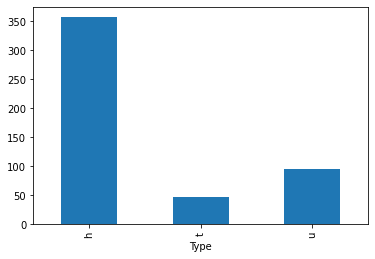

In [27]:
type_group = data.groupby('Type')
#type_group = data.groupby('CouncilArea')

type_group.size().plot(kind='bar')

#kind can be 'hist', 'scatter'

<h1>Sales by Regionname</h1>

<AxesSubplot:xlabel='Regionname'>

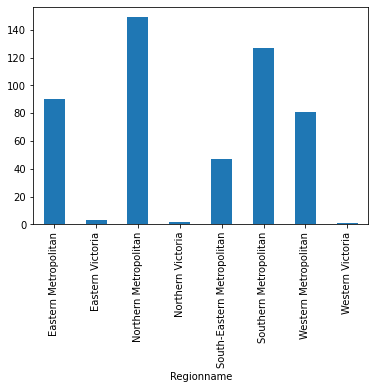

In [28]:
Regionname_group = data.groupby('Regionname')
Regionname_group.size().plot(kind='bar')

<h2>Let's combine the two in a single graph</h2>


<AxesSubplot:xlabel='Type,Regionname'>

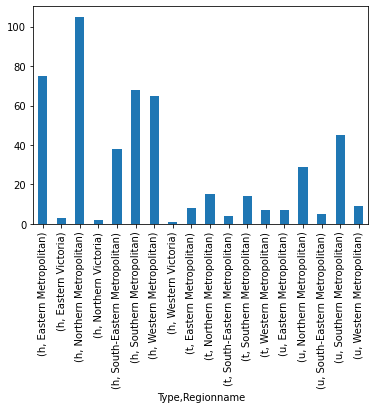

In [27]:

type_region = data.groupby(['Type','Regionname'])
type_region.size().plot(kind='bar')


In [28]:
type_region.size()

# type_region.size().loc["h"]


Type  Regionname                
h     Eastern Metropolitan           75
      Eastern Victoria                3
      Northern Metropolitan         105
      Northern Victoria               2
      South-Eastern Metropolitan     38
      Southern Metropolitan          68
      Western Metropolitan           65
      Western Victoria                1
t     Eastern Metropolitan            8
      Northern Metropolitan          15
      South-Eastern Metropolitan      4
      Southern Metropolitan          14
      Western Metropolitan            7
u     Eastern Metropolitan            7
      Northern Metropolitan          29
      South-Eastern Metropolitan      5
      Southern Metropolitan          45
      Western Metropolitan            9
dtype: int64

In [29]:
type_region.size().unstack()


Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
Type,,,,,,,,
h,75.0,3.0,105.0,2.0,38.0,68.0,65.0,1.0
t,8.0,NaN,15.0,NaN,4.0,14.0,7.0,NaN
u,7.0,NaN,29.0,NaN,5.0,45.0,9.0,NaN


In [30]:
type(type_region.size().unstack())

pandas.core.frame.DataFrame

<h2>This is not that unreadable... </h2>

<h3>We can unstack the groups so that we get region by type of property</h3>

<AxesSubplot:xlabel='Type'>

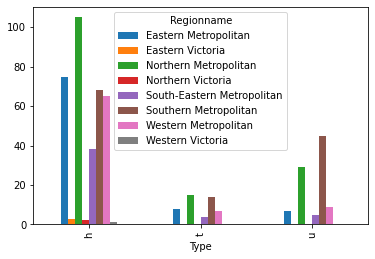

In [31]:
type_region.size().unstack().plot(kind='bar')

<h3>Increase the size of the image and add a title</h3>

<AxesSubplot:title={'center':'Sales in each region by type'}, xlabel='Type'>

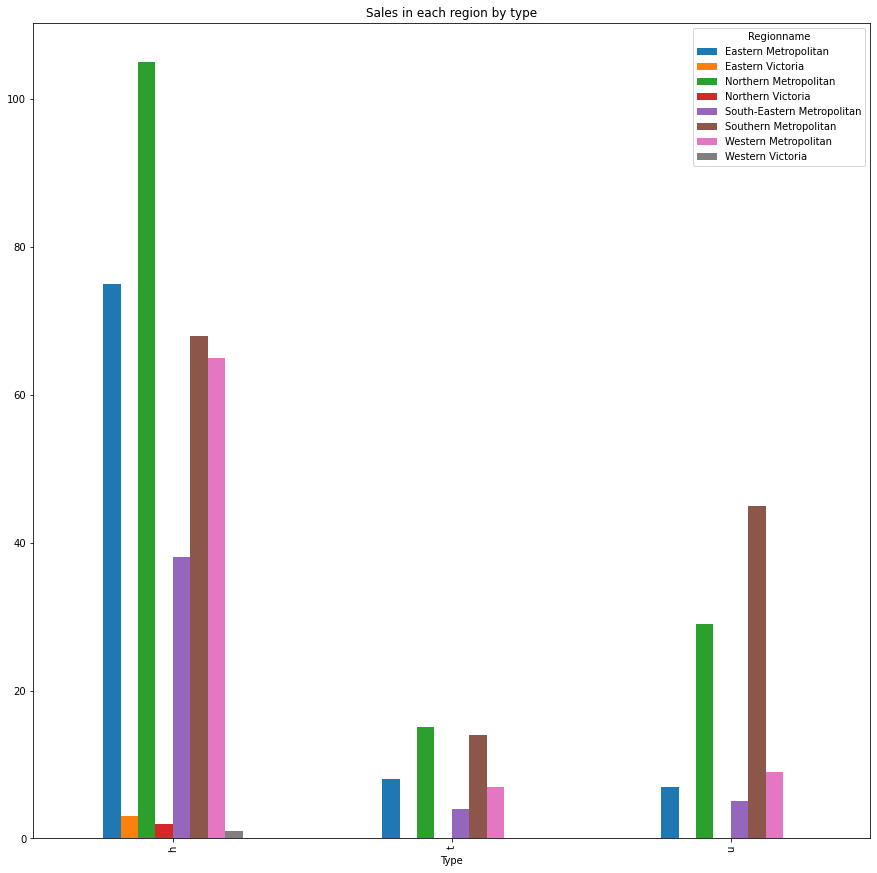

In [32]:

Type_region = data.groupby(['Type','Regionname'])
Type_region.size().unstack().plot(kind='bar',title="Sales in each region by type",figsize=(15,15))


<h1>Digression: The pandas groupby function</h1>

<h4>You can use functions to group data</h4>

In [33]:
import pandas as pd
writers = pd.DataFrame({'Author':['George Orwell','John Steinbeck',
                                  'Pearl Buck','Agatha Christie'],
                        'Country':['UK','USA','USA','UK'],
                        'Gender':['M','M','F','F'],
                        'Age':[46,66,80,85]})
                        


In [34]:
writers

,Author,Country,Gender,Age
0,George Orwell,UK,M,46
1,John Steinbeck,USA,M,66
2,Pearl Buck,USA,F,80
3,Agatha Christie,UK,F,85


<h4>Group by country</h4>

In [35]:
grouped = writers.groupby('Country')

type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [36]:
grouped.first()


,Author,Gender,Age
Country,,,
UK,George Orwell,M,46
USA,John Steinbeck,M,66


In [37]:
grouped.last()


,Author,Gender,Age
Country,,,
UK,Agatha Christie,F,85
USA,Pearl Buck,F,80


In [38]:
 grouped.sum()
# grouped.mean()

,Age
Country,
UK,131
USA,146


In [39]:
grouped.apply(sum)

,Author,Country,Gender,Age
Country,,,,
UK,George OrwellAgatha Christie,UKUK,MF,131
USA,John SteinbeckPearl Buck,USAUSA,MF,146


In [40]:
(grouped.groups)

{'UK': [0, 3], 'USA': [1, 2]}

<h4>Group by multiple columns</h4>

In [60]:
grouped = writers.groupby(['Country','Gender'])
grouped.groups

{('UK', 'F'): [3], ('UK', 'M'): [0], ('USA', 'F'): [2], ('USA', 'M'): [1]}

<h2>Grouping by the values in a column</h2>
<h3>For example, grouping the data by values in a column that are greater than or less than zero</h3>

In [42]:
import numpy as np
people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'], index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,-1.081466,-0.170923,0.562470,-0.176624,-0.972171
Steve,1.541241,-0.461059,-0.664048,0.604503,2.501433
Wes,-1.351407,-0.877176,0.734008,-1.465529,-0.085221
Jim,0.275389,0.120855,0.351002,-0.851645,-1.264274
Travis,-0.037308,0.201714,2.189403,0.006058,-1.386643


In [44]:
people['grp'] = people['a'].apply(lambda x: 'Group1' if x>0 else 'Group2')
people

,a,b,c,d,e,grp
Joe,-1.081466,-0.170923,0.562470,-0.176624,-0.972171,Group2
Steve,1.541241,-0.461059,-0.664048,0.604503,2.501433,Group1
Wes,-1.351407,-0.877176,0.734008,-1.465529,-0.085221,Group2
Jim,0.275389,0.120855,0.351002,-0.851645,-1.264274,Group1
Travis,-0.037308,0.201714,2.189403,0.006058,-1.386643,Group2


<h3>Write a function that takes three arguments - a dataframe, an index, and a column name and returns the grouping for that row</h3>

In [127]:
# def GroupColFunc(df, ind, col):
#     if df[col].loc[ind] > 0:
#         return 'Group1'
#     else:
#         return 'Group2'
    
# people.groupby(lambda x: GroupColFunc(people, x, 'a')).groups

In [45]:
people.groupby('grp').groups

{'Group1': ['Steve', 'Jim'], 'Group2': ['Joe', 'Wes', 'Travis']}

<h2>Now we can compute stats on these groups</h2>

In [46]:
print(people.groupby('grp').mean())


               a         b         c         d         e
grp                                                     
Group1  0.908315 -0.170102 -0.156523 -0.123571  0.618580
Group2 -0.823394 -0.282128  1.161960 -0.545365 -0.814678


In [47]:
print(people.groupby('grp').std())

               a         b         c         d         e
grp                                                     
Group1  0.895093  0.411475  0.717749  1.029652  2.662757
Group2  0.694021  0.547974  0.893916  0.802103  0.664852


## Handling Time

<h3>We'll start by creating a new date field yyyymm

In [48]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Avg_room_num,Rel_room_num
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2.346970,1.278244
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3.003236,0.998922
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.003236,0.665948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,2018-03-31,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council,3.257622,0.613945
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,2018-03-31,3072,Northern Metropolitan,14577,8.4,Darebin City Council,2.781051,1.078729
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council,3.386431,0.885889
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council,3.386431,0.885889


In [49]:
import datetime
df['yyyymmdd'] = df['Date'].apply(lambda x:datetime.datetime.strftime(x,'%Y%m%d'))

In [50]:
(df['yyyymmdd'])

0        20170401
1        20170401
2        20170401
3        20170401
4        20170401
           ...   
63016    20180331
63017    20180331
63018    20180331
63019    20180331
63020    20180331
Name: yyyymmdd, Length: 48432, dtype: object

In [78]:
a = df.iloc[1]['yyyymmdd']
type(a)

str

In [57]:
date_seller = df[df['Regionname']== "Northern Victoria"].groupby(['yyyymmdd','SellerG'])
date_seller.size()

yyyymmdd  SellerG   
20160204  Daniel        1
          Harcourts     1
          Ray           1
20160416  Mason         1
20160423  Mason         1
                       ..
20181006  Ray           1
20181013  Buckingham    1
          FN            1
          Mason         1
          Raine         3
Length: 347, dtype: int64

In [58]:
date_seller.size().unstack()

SellerG,Barry,Bell,Brad,Buckingham,Coventry,Daniel,Darren,Emerson,Eric,Eview,...,Ray,Reliance,Ruralco,Ryder,Stockdale,Sweeney,The,YPA,hockingstuart,hockingstuart/hockingstuart
yyyymmdd,,,,,,,,,,,,,,,,,,,,,
20160204,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20180915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
20180922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='yyyymmdd'>

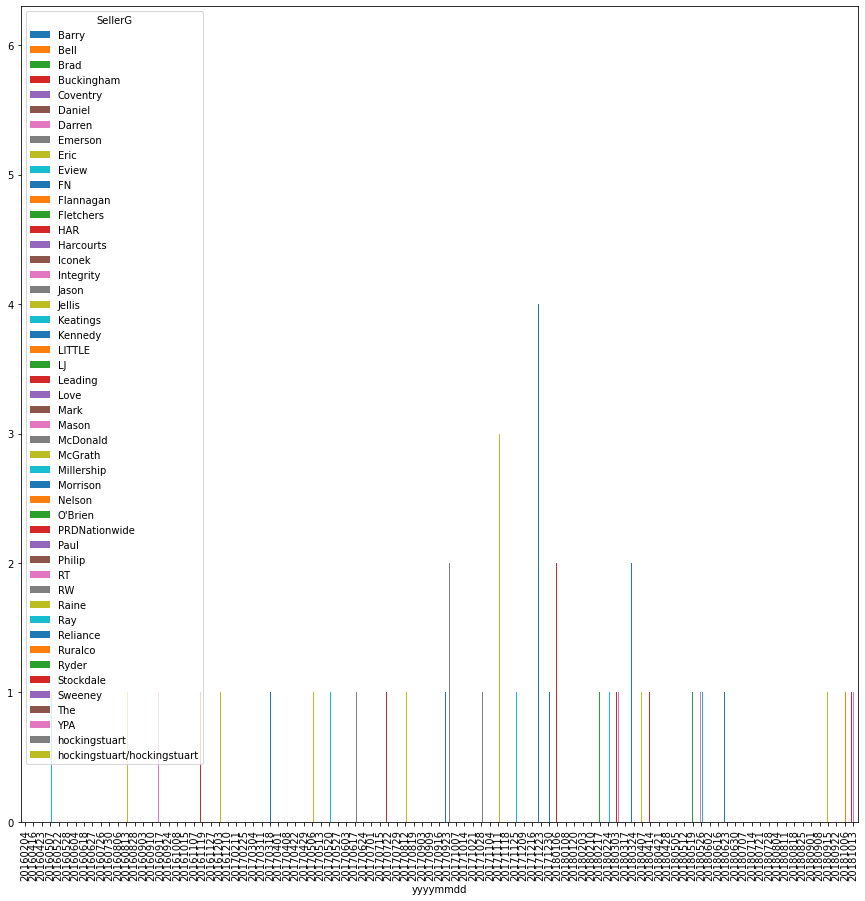

In [84]:
date_seller.size().unstack().plot(kind='bar',figsize=(15,15))


In [ ]:
df['Regionname']

<h1>Examining Sales</h1>

<h2>We'll look at the frequency by agency and report the top 5 values</h2>

In [59]:
df.groupby('Regionname').size().sort_values(ascending=False)

Regionname
Northern Metropolitan         13598
Southern Metropolitan         12548
Western Metropolitan           9680
Eastern Metropolitan           7585
South-Eastern Metropolitan     4010
Northern Victoria               455
Eastern Victoria                374
Western Victoria                182
dtype: int64

<AxesSubplot:xlabel='Regionname'>

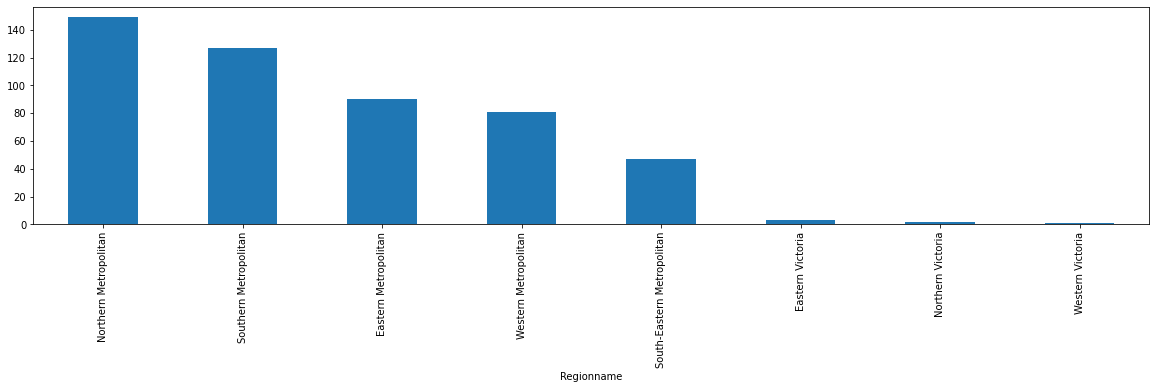

In [60]:
data.groupby('Regionname').size().sort_values(ascending=False).plot(kind='bar', figsize=(20,4))

<h3>We can drill down into sales by seller and by region</h3>

In [61]:
seller_region = df.groupby(['SellerG', 'Regionname']).size().unstack()

In [62]:
seller_region

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
SellerG,,,,,,,,
@Realty,5.0,NaN,14.0,NaN,1.0,NaN,1.0,NaN
A,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
AIME,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ASL,7.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Abercromby's,1.0,NaN,7.0,NaN,NaN,34.0,NaN,NaN
...,...,...,...,...,...,...,...,...
iOne,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
iProperty,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iSell,NaN,NaN,NaN,NaN,98.0,1.0,NaN,NaN


In [64]:
for (label,col) in seller_region.iteritems():
    print(label,col)

Eastern Metropolitan SellerG
@Realty          5.0
A                NaN
AIME             NaN
ASL              7.0
Abercromby's     1.0
                ... 
iOne             NaN
iProperty        1.0
iSell            NaN
iTRAK           58.0
voglwalpole      2.0
Name: Eastern Metropolitan, Length: 422, dtype: float64
Eastern Victoria SellerG
@Realty         NaN
A               NaN
AIME            NaN
ASL             NaN
Abercromby's    NaN
               ... 
iOne            NaN
iProperty       NaN
iSell           NaN
iTRAK           8.0
voglwalpole     NaN
Name: Eastern Victoria, Length: 422, dtype: float64
Northern Metropolitan SellerG
@Realty         14.0
A                6.0
AIME             NaN
ASL              3.0
Abercromby's     7.0
                ... 
iOne             NaN
iProperty        NaN
iSell            NaN
iTRAK            1.0
voglwalpole      NaN
Name: Northern Metropolitan, Length: 422, dtype: float64
Northern Victoria SellerG
@Realty        NaN
A              NaN
AIME 

<h3>We can create 'top 5 sellers' subplots for each region</h3>

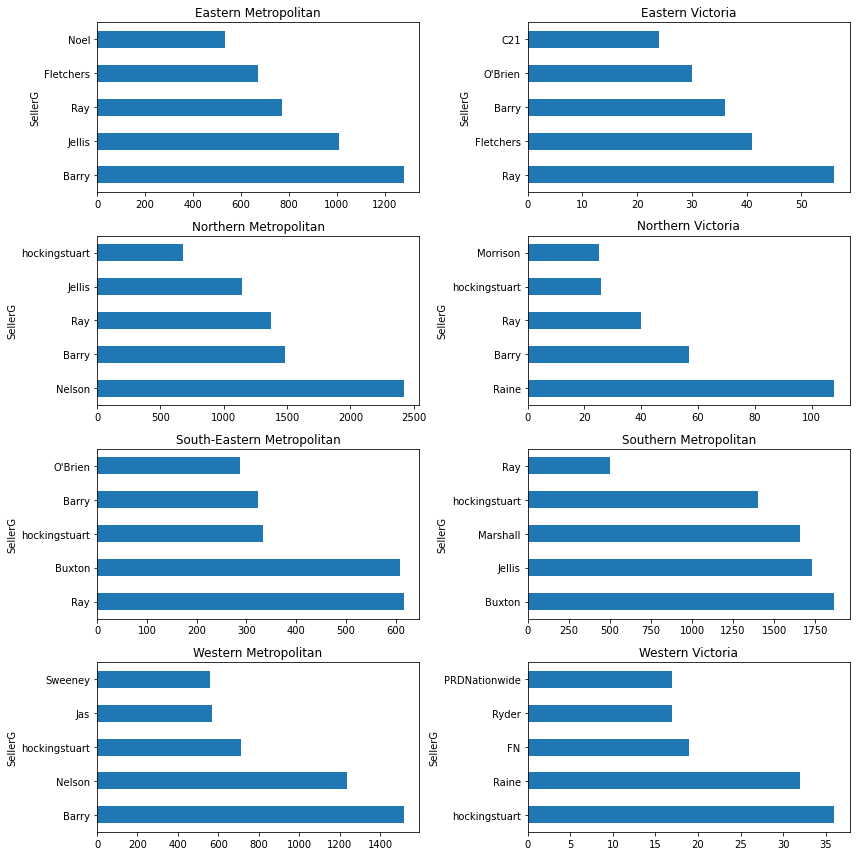

In [20]:
#We'll arrange the subplots in two rows and four columns. 
COL_NUM = 2
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))  #we create 4*2 subplots

for i, (label, col) in enumerate(seller_region.iteritems()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM] #for each i (region)- where the plot is located
    col = col.sort_values(ascending=False)[:5] # sorting the size values for each seller (at each region) and selecting the top 5
    col.plot(kind='barh', ax=ax) #ploting the top 5 in a horizontal bar chart in the ax location
    ax.set_title(label) #setting the region name as the title of the particular location in the figure

plt.tight_layout()  #automatically adjusts subplot params so that the subplot(s) fits in to the figure area

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218557D1D88>,
      dtype=object)

In [83]:
for i, (label, col) in enumerate(seller_region.iteritems()): 
    print(i,label,col)

0 Eastern Metropolitan SellerG
@Realty          5.0
A                NaN
AIME             NaN
ASL              7.0
Abercromby's     1.0
                ... 
iOne             NaN
iProperty        1.0
iSell            NaN
iTRAK           58.0
voglwalpole      2.0
Name: Eastern Metropolitan, Length: 422, dtype: float64
1 Eastern Victoria SellerG
@Realty         NaN
A               NaN
AIME            NaN
ASL             NaN
Abercromby's    NaN
               ... 
iOne            NaN
iProperty       NaN
iSell           NaN
iTRAK           8.0
voglwalpole     NaN
Name: Eastern Victoria, Length: 422, dtype: float64
2 Northern Metropolitan SellerG
@Realty         14.0
A                6.0
AIME             NaN
ASL              3.0
Abercromby's     7.0
                ... 
iOne             NaN
iProperty        NaN
iSell            NaN
iTRAK            1.0
voglwalpole      NaN
Name: Northern Metropolitan, Length: 422, dtype: float64
3 Northern Victoria SellerG
@Realty        NaN
A              N

<h1>Pricing </h1>
<h2>We can compute simple statistics</h2>

In [65]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Suburb', 'Address', 'Rooms', 'Type',
       'Price', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname',
       'Propertycount', 'Distance', 'CouncilArea', 'Avg_room_num',
       'Rel_room_num', 'lat_long', 'lat', 'lng'],
      dtype='object')

In [66]:
grouped = data[['Price','Regionname']].groupby('Regionname')

In [67]:
grouped.describe()

Price                                         \
                            count          mean            std       min   
Regionname                                                                 
Eastern Metropolitan         90.0  1.147026e+06  421684.026862  420000.0   
Eastern Victoria              3.0  5.353333e+05  213216.634748  378000.0   
Northern Metropolitan       149.0  8.781585e+05  526282.532205  325000.0   
Northern Victoria             2.0  5.700000e+05  226274.169980  410000.0   
South-Eastern Metropolitan   47.0  8.827564e+05  532843.576098  307000.0   
Southern Metropolitan       127.0  1.344648e+06  772814.404900  295000.0   
Western Metropolitan         81.0  8.077519e+05  341756.189816  330000.0   
Western Victoria              1.0  4.310000e+05            NaN  431000.0   

                                                                       
                                 25%        50%        75%        max  
Regionname                                                             
Eastern Metropolitan        816250.0  1100040.0  1375000.0  3105000.0  
Eastern Victoria            414000.0   450000.0   614000.0   778000.0  
Northern Metropolitan       542000.0   725000.0  1070000.0  4150000.0  
Northern Victoria           490000.0   570000.0   650000.0   730000.0  
South-Eastern Metropolitan  637500.0   825000.0   955000.0  4000000.0  
Southern Metropolitan       800000.0  1270000.0  1610000.0  5000000.0  
Western Metropolitan        593000.0   715000.0   910000.0  2000000.0  
Western Victoria            431000.0   431000.0   431000.0   431000.0

<h2>Let's order regions by mean price in a decreasing order</h2>

<AxesSubplot:xlabel='Regionname'>

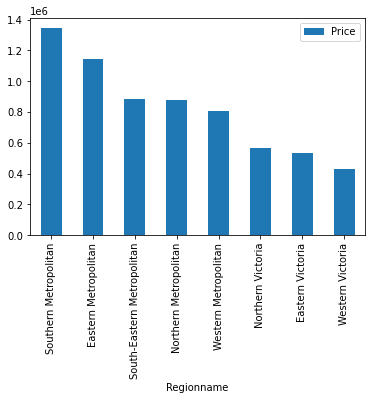

In [68]:
grouped.mean().sort_values('Price',ascending=False).plot(kind="bar")

<AxesSubplot:>

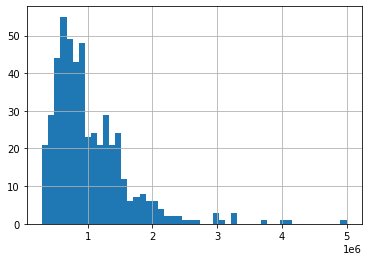

In [69]:
data['Price'].hist(bins=50)

<AxesSubplot:>

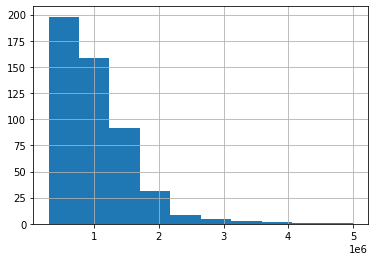

In [70]:
data['Price'].hist(bins=10)

<h1>Other useful visualization libraries</h1>
<h2>seaborn: https://seaborn.pydata.org/</h2>
<h2>bokeh: http://bokeh.pydata.org/en/latest/</h2>
<h2>plotly: https://plot.ly/</h2>
